<a href="https://colab.research.google.com/github/meriem-belkacemi/Machine-Learning-Notebooks/blob/main/TP_3_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




```
# Ce TP a été réalisé par :

*   BELKACEMI Meriem
*   LABRI Ahlem
*   MAYOUF Lotfi

Du groupe 2.
```






# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
data = np.genfromtxt('data.csv', delimiter=',')
data.shape

(100, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données.

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];

In [ ]:
print('X', X.shape ,' y ', y.shape)

X (100, 3)  y  (100,)


# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [ ]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1 / (1 + np.exp(-z))


1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [ ]:
def computeCost(X, y, theta):
    m = y.size
    # calculer les prédictions du modèle pour les exemples d'entraînement actuels
    h = Sigmoid(X.dot(theta))

    # calculer la fonction de coût J pour le modèle actuel
    J = -1/m * (np.log(h).T.dot(y) + np.log(1-h).T.dot(1-y))

    return J[0]

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations,early_stop=False):

    n = len(X) # nombre d'exemples d'entraînement
    cost = [] # stocke l'historique des coûts
    gradients = [] # stocke l'historique des gradients
    epsilon = 1e-9 # seuil d'arrêt pour early stopping
    for i in range(iterations):
        # Calculer le coût actuel et l'ajouter à l'historique des coûts
        cost.append(computeCost(X, y, theta))

        # Calculer les prédictions du modèle pour les exemples d'entraînement actuels
        y_pred = Sigmoid(X.dot(theta))

        # Calculer le gradient de la fonction de coût par rapport aux paramètres theta
        theta_d = -(1/n) * (X.T.dot(y[:, None] - y_pred))

        # Ajouter le gradient actuel à l'historique des gradients
        gradients.append(theta_d.reshape((theta_d.shape[0],)))

        # Mettre à jour les paramètres theta en utilisant le taux d'apprentissage alpha et le gradient actuel
        theta -= alpha * theta_d

        # Vérifier si l'algorithme doit s'arrêter tôt en fonction de la moyenne des gradients
        if early_stop and np.abs(theta_d.mean()) < epsilon:
            break

    # Convertir les listes en tableaux numpy et les renvoyer
    return theta, np.asarray(cost), np.asarray(gradients)

In [ ]:
def plot_cost_gradient(costs, gradients):
    # Définition d'une figure avec 1 ligne et 2 colonnes de graphes
    plt.figure(figsize=(13, 5))
    plt.subplot(1, 2, 1)

    # Tracer la courbe du coût en fonction du nombre d'itérations
    plt.plot(range(costs.shape[0]), costs)
    plt.xlabel('iterations')
    plt.ylabel('cost')

    # Ajout du titre du graphe
    plt.title("Courbe de coût")

    # Tracer le gradient de chaque paramètre en fonction du nombre d'itérations
    plt.subplot(1, 2, 2)
    for i in range(gradients.shape[1]):
        plt.plot(range(gradients.shape[0]), gradients[:, i])

    # Ajout des étiquettes de l'axe x et y et le titre du graphe
    plt.xlabel('iterations')
    plt.ylabel('gardient')
    plt.title("Courbe de gradient")

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [ ]:
#On récupère le nombre de colonnes de la matrice X, correspondant au nombre de features
n=X.shape[1]
#On initialise le vecteur theta avec des zéros, en prenant en compte le nombre de features de X
theta = np.zeros((n, 1))
theta

array([[0.],
       [0.],
       [0.]])

Calculer le cout initial

In [ ]:
initialCost=computeCost(X, y, theta)
initialCost

0.6931471805599452

Appel des la fonction de calcul du gradient

In [ ]:
# paramètres
iterations = 5000;
alpha = 0.01;
# Appel
theta, costs, gradients = gradientDescent(X, y, theta, alpha, iterations);
theta

array([[-2.84212435],
       [ 0.15323139],
       [ 0.11346886]])

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

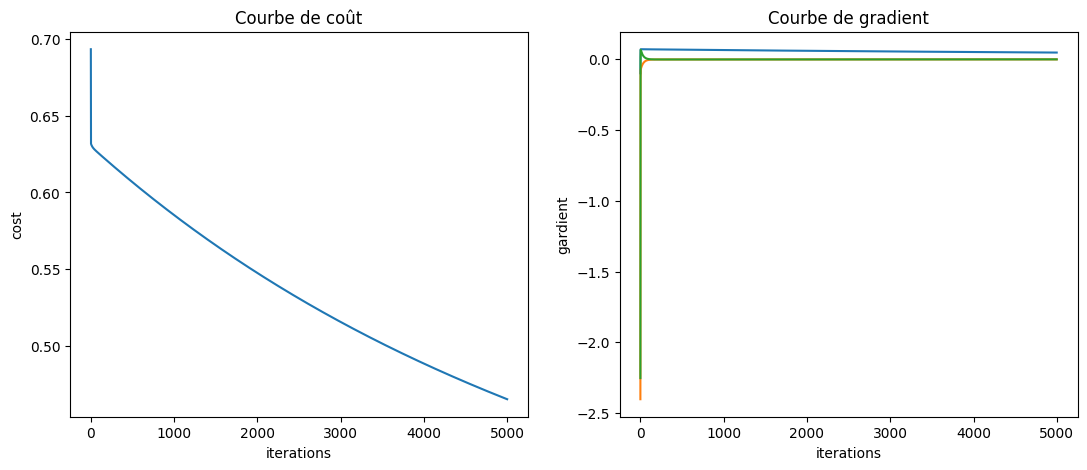

In [ ]:
plot_cost_gradient(costs,gradients)

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [ ]:
# Cette fonction permet de dessiner une ligne de séparation pour un modèle de classification binaire entraîné avec la méthode des moindres carrés.
def drawLine(X , y , theta , title = ""):

  # Afficher les points de données pour lesquels y vaut 1
  plt.scatter(X[np.where(y==1) , 1] , X[np.where(y==1) , 2] , label="accepté" , marker = "o")

  # Afficher les points de données pour lesquels y vaut 0
  plt.scatter(X[np.where(y==0) , 1] , X[np.where(y==0) , 2] , label="non accepté" , marker = "x")

  # Ajouter une étiquette pour l'axe des abscisses
  plt.xlabel('note 1')

  # Ajouter une étiquette pour l'axe des ordonnées
  plt.ylabel('note 2')

  # Déterminer les points extrêmes pour l'axe des abscisses
  x1 = np.min(X[:,1])
  x2 = np.max(X[:,1])

  # Déterminer les coordonnées y des points correspondants sur la ligne de séparation
  y1 = -(theta[0] + theta[1]*x1) / theta[2]
  y2 = -(theta[0] + theta[1]*x2) / theta[2]

  # Ajouter un titre pour le graphique
  plt.title(title)

  # Définir les limites pour l'axe des ordonnées
  plt.ylim([5, 22])

  # Tracer la ligne de séparation à l'aide des points déterminés ci-dessus
  plt.plot([x1 , x2]  , [y1 , y2])

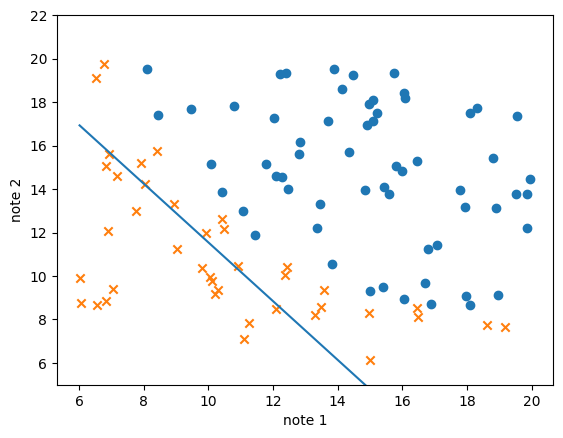

In [ ]:
drawLine(X , y , theta )

# Affichage
Graphe representant les acceptations selon les caracteristiques

Text(0, 0.5, 'Note module 2')

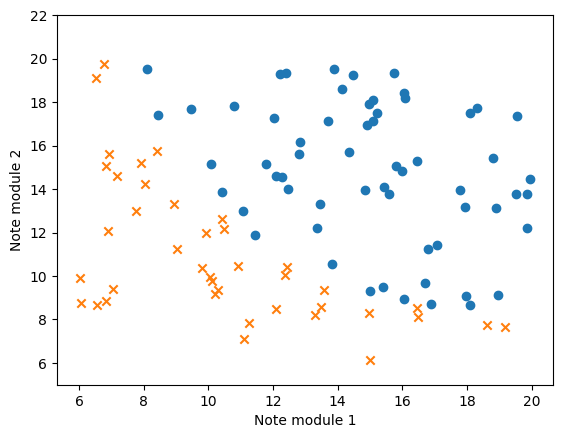

In [ ]:
# Afficher les points de données pour lesquels y vaut 1 avec un marqueur "o"
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')

# Afficher les points de données pour lesquels y vaut 0 avec un marqueur "x"
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')

# Définir les limites pour l'axe des ordonnées
plt.ylim([5, 22])

# Ajouter une étiquette pour l'axe des abscisses
plt.xlabel('Note module 1')

# Ajouter une étiquette pour l'axe des ordonnées
plt.ylabel('Note module 2')

Traçage du coût en fonction de theta0 et theta1

In [ ]:
#pas la peine de la faire

Prédire des valeurs de y

In [ ]:
# Predire pour des notes note1= 9 et note2=17
predict = np.matmul([1,9,17],theta)
float(predict)

0.46592873300893234

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
# Importer la classe LogisticRegression depuis la bibliothèque scikit-learn
from sklearn.linear_model import LogisticRegression

# Définir une fonction qui compare les résultats de notre modèle avec ceux d'un modèle scikit-learn
def compare(X , y , theta):

    # Créer un objet LogisticRegression avec penalty="none" et max_iter=5000, puis l'entraîner sur les données X et y
    sklearn_model = LogisticRegression(penalty="none" , max_iter = 5000 )
    sklearn_model.fit(X[: , 1:] , y)

    # Extraire les coefficients de régression (intercept et pentes) du modèle scikit-learn et les stocker dans un vecteur theta
    sklearn_theta = np.zeros(theta.shape)
    sklearn_theta[0 , 0] = sklearn_model.intercept_[0]
    sklearn_theta [1 : , 0] = sklearn_model.coef_.reshape(-1 , 1)[:,0]

    # Afficher les valeurs de theta pour les deux modèles
    print("sklearn model theta : \n" , sklearn_theta)
    print("\n our model theta  : \n" , theta)

    # Afficher les valeurs de coût (erreur) pour les deux modèles
    print("sklearn error (cost)    :" , computeCost(X , y , sklearn_theta))
    print("our model error (cost)  :" , computeCost(X , y , theta))

    # Créer une figure contenant deux sous-graphiques
    plt.figure(figsize=(15, 7))

    # Afficher la frontière de décision du modèle scikit-learn dans le premier sous-graphique
    plt.subplot(1,2,1)
    drawLine(X , y , sklearn_theta , "Sklearn model")

    # Afficher la frontière de décision de notre modèle dans le deuxième sous-graphique
    plt.subplot(1,2,2)
    drawLine(X , y , theta , "Our model")

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


sklearn model theta : 
 [[-25.16191033]
 [  1.03118901]
 [  1.00736753]]

 our model theta  : 
 [[-2.84212435]
 [ 0.15323139]
 [ 0.11346886]]
sklearn error (cost)    : 0.2034945114797248
our model error (cost)  : 0.46544452056668095


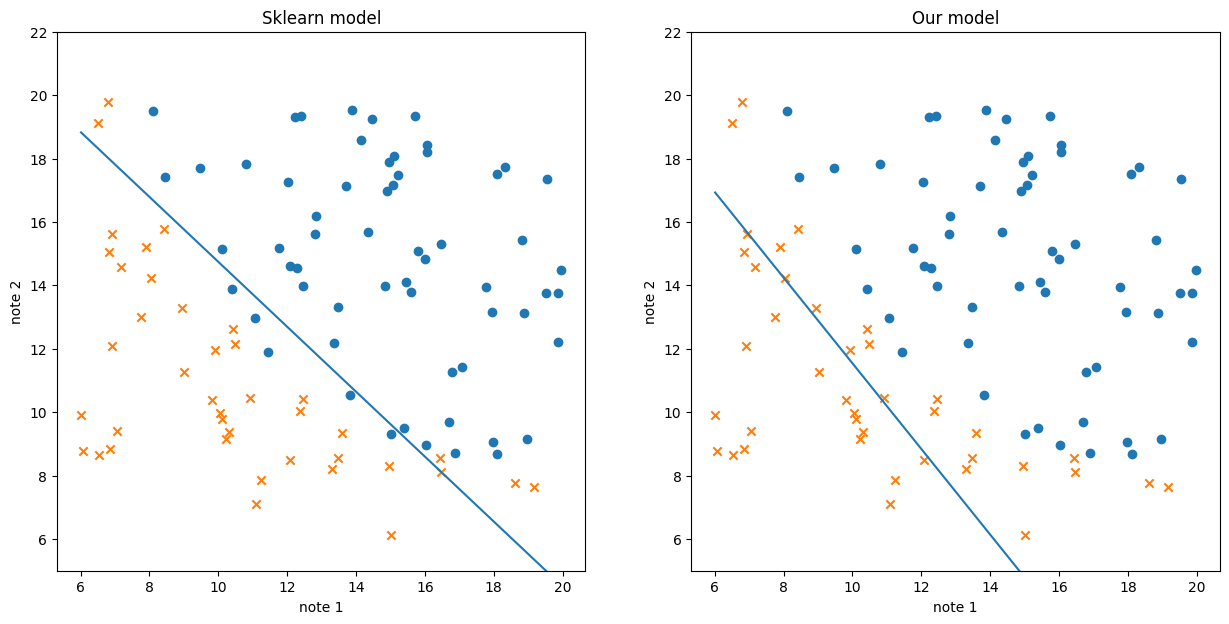

In [ ]:
compare(X , y , theta)

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

### Standarisation des données

> Afin d'améliorer la performance de notre modèle, on effectue une standarisation de nos données.



In [ ]:
#Calcul de la moyenne et de l'écart type de toutes les colonnes de la matrice X, à l'exception de la première colonne.
X_mean, X_std = X[:, 1:].mean(axis=0), X[:, 1:].std(axis=0)

#Création d'une matrice X_standardized de la même taille que X, remplie de 1.
X_standardized = np.ones_like(X)

#Normalisation des colonnes de la matrice X, à l'exception de la première colonn
X_standardized[:, 1:] = (X[:, 1:] - X_mean) / X_std

#Calcul de la moyenne et de l'écart type du vecteur y.
y_mean, y_std = y.mean(), y.std()

#Normalisation du vecteur y à moins que son écart type soit nul ou NaN. Dans ce cas, le vecteur y est simplement soustrait de sa moyenne.
if y_std == 0 or np.isnan(y_std):
    y_standardized = y - y_mean
else:
    y_standardized = (y - y_mean) / y_std

X_standardized.shape

(100, 3)

In [ ]:
# Initialiser theta à zéro
theta = np.zeros((X_standardized.shape[1], 1))

In [ ]:
#Initialisation des parametres
iterations = 5000;
alpha = 0.01;
# Appel
theta, costs, gradients = gradientDescent(X_standardized, y, theta, alpha, iterations);
theta


array([[1.00392463],
       [2.49065817],
       [2.27713323]])

Redefinir les bornes de l'axe Y pour les nouvelles données standarisées

In [ ]:
def drawLine(X , y , theta , title = ""):

  # Afficher les points de données pour lesquels y vaut 1
  plt.scatter(X[np.where(y==1) , 1] , X[np.where(y==1) , 2] , label="accepté" , marker = "o")

  # Afficher les points de données pour lesquels y vaut 0
  plt.scatter(X[np.where(y==0) , 1] , X[np.where(y==0) , 2] , label="non accepté" , marker = "x")

  # Ajouter une étiquette pour l'axe des abscisses
  plt.xlabel('note 1')

  # Ajouter une étiquette pour l'axe des ordonnées
  plt.ylabel('note 2')

  # Déterminer les points extrêmes pour l'axe des abscisses
  x1 = np.min(X[:,1])
  x2 = np.max(X[:,1])

  # Déterminer les coordonnées y des points correspondants sur la ligne de séparation
  y1 = -(theta[0] + theta[1]*x1) / theta[2]
  y2 = -(theta[0] + theta[1]*x2) / theta[2]

  # Ajouter un titre pour le graphique
  plt.title(title)

  # Définir les limites pour l'axe des ordonnées
  plt.ylim([-3, 2])

  # Tracer la ligne de séparation à l'aide des points déterminés ci-dessus
  plt.plot([x1 , x2]  , [y1 , y2])

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


sklearn model theta : 
 [[1.7184621 ]
 [3.99290321]
 [3.72518393]]

 our model theta  : 
 [[1.00392463]
 [2.49065817]
 [2.27713323]]
sklearn error (cost)    : 0.2034945114811322
our model error (cost)  : 0.22446104727868602


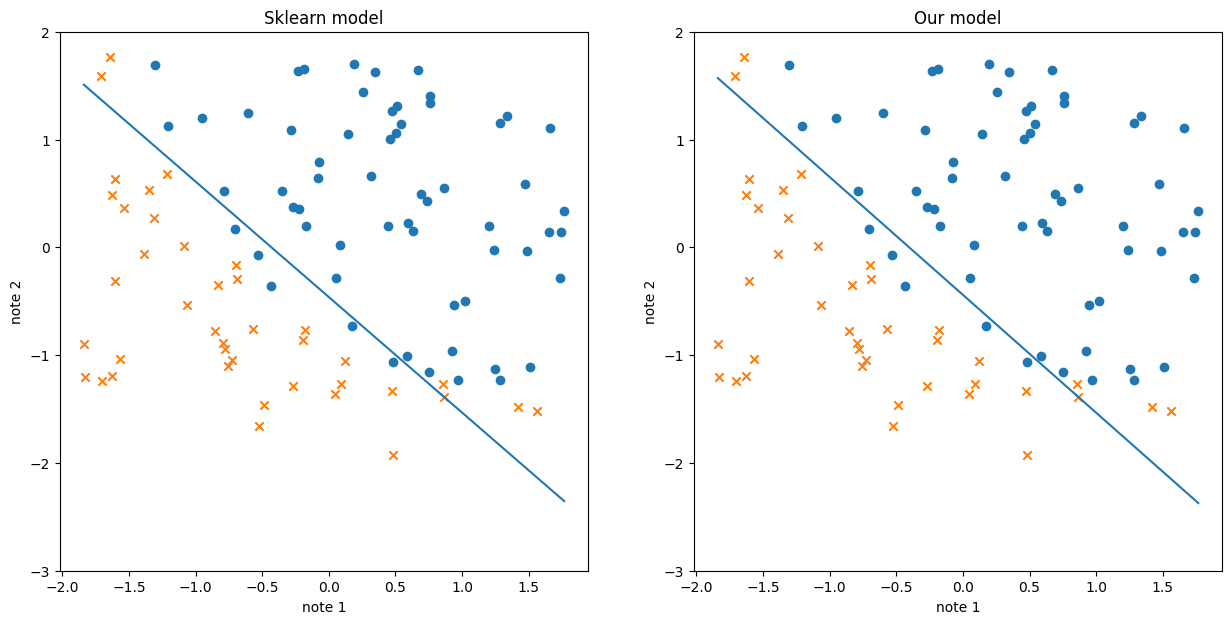

In [ ]:
#Comparer les nouvelles performances de notre modèle à celui de Sklearn
compare(X_standardized, y , theta)

Nous Remarquons que notre modèle performe largent mieux qu'avec des données non normalisées. La décision boundary est beaucoup plus précise et se rapproche grandement de celle de Sklearn

### Une autre suggestion pour renforcer l'apprentissage serait de faire une regression polynomiale au problème.
La régression polynomiale est une technique de modélisation qui consiste à ajuster une fonction polynomiale à un ensemble de données. Dans notre cas, elle permet de modéliser des relations non linéaires entre les variables de notre dataset en ajoutant des termes de puissance supérieure à 1 dans la fonction de régression. Ainsi, la régression polynomiale peut aider à améliorer la performance de modèle en capturant des relations non linéaires entre les variables.

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 18 Avril 2023


In [ ]:
# bonne chance